# 오피스텔_실거래가

### 데이터 불러오기

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

In [3]:
officetel23 = pd.read_csv('data_yena/오피스텔(전월세)_실거래가_2023.csv', header=15, encoding='cp949')
officetel24 = pd.read_csv('data_yena/오피스텔(전월세)_실거래가_2024.csv', header=15, encoding='cp949')

C:\Users\emily\AppData\Local\Temp\ipykernel_20752\1406227441.py:2: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  officetel24 = pd.read_csv('data_yena/오피스텔(전월세)_실거래가_2024.csv', header=15, encoding='cp949')


In [4]:
officetel23_deal = pd.read_csv('data_yena/오피스텔(매매)_실거래가_2023.csv', header=15, encoding='cp949')
officetel24_deal = pd.read_csv('data_yena/오피스텔(매매)_실거래가_2024.csv', header=15, encoding='cp949')

In [5]:
officetel23_deal.nunique()

NO          8982
시군구          236
번지          1533
본번           692
부번           140
단지명         1582
전용면적(㎡)     2427
계약년월          12
계약일           31
거래금액(만원)    1320
층             50
매수             1
매도             1
건축년도          37
도로명         1501
해제사유발생일      193
거래유형           2
중개사소재지       192
dtype: int64

In [39]:
officetel23['보증금(만원)'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 73554 entries, 0 to 73553
Series name: 보증금(만원)
Non-Null Count  Dtype 
--------------  ----- 
73554 non-null  object
dtypes: object(1)
memory usage: 574.8+ KB


In [7]:
officetel23_deal.describe()

,NO,본번,부번,전용면적(㎡),계약년월,계약일,층,건축년도
count,8982.000000,8982.000000,8982.000000,8982.000000,8982.000000,8982.000000,8982.000000,8854.000000
mean,4491.500000,479.636607,14.776664,31.280880,202306.695391,15.600312,8.736139,2011.765191
std,2593.024392,429.430243,41.239851,18.504105,3.474061,8.402901,5.357279,9.048839
min,1.000000,1.000000,0.000000,9.940000,202301.000000,1.000000,1.000000,1987.000000
25%,2246.250000,104.000000,1.000000,20.680000,202304.000000,8.000000,5.000000,2004.000000
50%,4491.500000,369.000000,4.000000,26.821000,202307.000000,15.000000,8.000000,2014.000000
75%,6736.750000,760.000000,12.000000,34.717500,202310.000000,23.000000,12.000000,2019.000000
max,8982.000000,3001.000000,698.000000,483.960000,202312.000000,31.000000,68.000000,2023.000000


### 전처리

In [ ]:
# 전세만 필터링
officetel23_df = officetel23[officetel23['전월세구분']=='전세']
officetel24_df = officetel24[officetel24['전월세구분']=='전세']

In [ ]:
# 보증금(만원) 컬럼 타입 변환 (object -> int)
officetel23_df['보증금(만원)'] = officetel23_df['보증금(만원)'].astype(str).str.replace(',', '', regex=False)
officetel23_df['보증금(만원)'] = pd.to_numeric(officetel23_df['보증금(만원)']).astype(int)

C:\Users\emily\AppData\Local\Temp\ipykernel_20752\2833295483.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  officetel23_df['보증금(만원)'] = officetel23_df['보증금(만원)'].astype(str).str.replace(',', '', regex=False)
C:\Users\emily\AppData\Local\Temp\ipykernel_20752\2833295483.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  officetel23_df['보증금(만원)'] = pd.to_numeric(officetel23_df['보증금(만원)']).astype(int)


In [10]:
officetel24_df['보증금(만원)'] = officetel24_df['보증금(만원)'].astype(str).str.replace(',', '', regex=False)
officetel24_df['보증금(만원)'] = pd.to_numeric(officetel24_df['보증금(만원)']).astype(int)

C:\Users\emily\AppData\Local\Temp\ipykernel_20752\570142075.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  officetel24_df['보증금(만원)'] = officetel24_df['보증금(만원)'].astype(str).str.replace(',', '', regex=False)
C:\Users\emily\AppData\Local\Temp\ipykernel_20752\570142075.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  officetel24_df['보증금(만원)'] = pd.to_numeric(officetel24_df['보증금(만원)']).astype(int)


In [ ]:
# 거래금액(만원) 컬럼 타입 변환 (object -> int)
officetel23_deal['거래금액(만원)'] = officetel23_deal['거래금액(만원)'].str.replace(',', '').astype(int)
officetel24_deal['거래금액(만원)'] = officetel24_deal['거래금액(만원)'].str.replace(',', '').astype(int)

In [ ]:
# 계약년월 날짜 형식 변환
officetel23_df['계약년월'] = pd.to_datetime(officetel23_df['계약년월'].astype(str), format='%Y%m')
officetel24_df['계약년월'] = pd.to_datetime(officetel24_df['계약년월'].astype(str), format='%Y%m')

C:\Users\emily\AppData\Local\Temp\ipykernel_20752\3234963693.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  officetel23_df['계약년월'] = pd.to_datetime(officetel23_df['계약년월'].astype(str), format='%Y%m')
C:\Users\emily\AppData\Local\Temp\ipykernel_20752\3234963693.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  officetel24_df['계약년월'] = pd.to_datetime(officetel24_df['계약년월'].astype(str), format='%Y%m')


In [13]:
officetel23_deal['계약년월'] = pd.to_datetime(officetel23_deal['계약년월'].astype(str), format='%Y%m')
officetel24_deal['계약년월'] = pd.to_datetime(officetel24_deal['계약년월'].astype(str), format='%Y%m')

In [ ]:
# 중복 확인
officetel24_df[officetel24_df.duplicated()]

,NO,시군구,번지,본번,부번,단지명,전월세구분,전용면적(㎡),계약년월,계약일,보증금(만원),월세금(만원),층,건축년도,도로명,계약기간,계약구분,갱신요구권 사용,종전계약 보증금(만원),종전계약 월세(만원)


In [40]:
officetel23_df['계약구분'].value_counts()

신규    18270
갱신     5695
-      3737
Name: 계약구분, dtype: int64

In [41]:
officetel24_df['계약구분'].value_counts()

신규    18522
갱신     6266
-       658
Name: 계약구분, dtype: int64

In [49]:
officetel23_df[officetel23_df['계약구분']=='-']['종전계약 보증금(만원)']

16       NaN
37       NaN
39       NaN
57       NaN
62       NaN
        ... 
73491    NaN
73495    NaN
73506    NaN
73536    NaN
73540    NaN
Name: 종전계약 보증금(만원), Length: 3737, dtype: object

In [48]:
officetel24_df[officetel24_df['계약구분']=='-']['종전계약 보증금(만원)']

424      NaN
572      NaN
986      NaN
1131     NaN
1235     NaN
        ... 
83902    NaN
83905    NaN
84033    NaN
84069    NaN
84132    NaN
Name: 종전계약 보증금(만원), Length: 658, dtype: object

In [50]:
officetel23_df['계약구분'] = officetel23_df['계약구분'].replace('-', '신규')
officetel23_df['계약구분'].value_counts()

C:\Users\emily\AppData\Local\Temp\ipykernel_20752\1056222888.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  officetel23_df['계약구분'] = officetel23_df['계약구분'].replace('-', '신규')


신규    22007
갱신     5695
Name: 계약구분, dtype: int64

<Axes: ylabel='계약구분'>

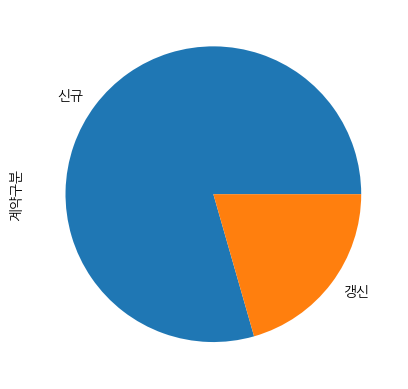

In [53]:
officetel23_df['계약구분'].value_counts().plot(kind='pie')

In [51]:
officetel24_df['계약구분'] = officetel23_df['계약구분'].replace('-', '신규')
officetel24_df['계약구분'].value_counts()

C:\Users\emily\AppData\Local\Temp\ipykernel_20752\794495321.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  officetel24_df['계약구분'] = officetel23_df['계약구분'].replace('-', '신규')


신규    6605
갱신    1793
Name: 계약구분, dtype: int64

<Axes: ylabel='계약구분'>

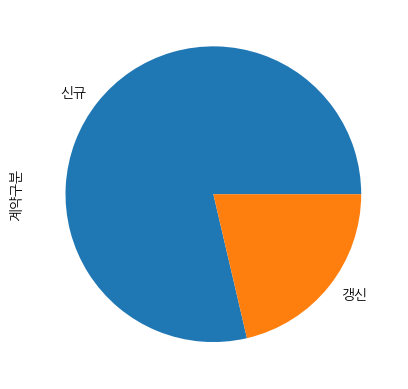

In [55]:
officetel24_df['계약구분'].value_counts().plot(kind='pie')

### 보증금

In [14]:
officetel23_df['보증금(만원)'].describe()

count     27702.000000
mean      22075.638546
std       10189.541282
min        2500.000000
25%       16400.000000
50%       20000.000000
75%       25200.000000
max      210000.000000
Name: 보증금(만원), dtype: float64

In [15]:
officetel24_df['보증금(만원)'].describe()

count     25446.000000
mean      24730.431856
std       13811.925370
min        1500.000000
25%       17000.000000
50%       22500.000000
75%       28780.000000
max      540000.000000
Name: 보증금(만원), dtype: float64

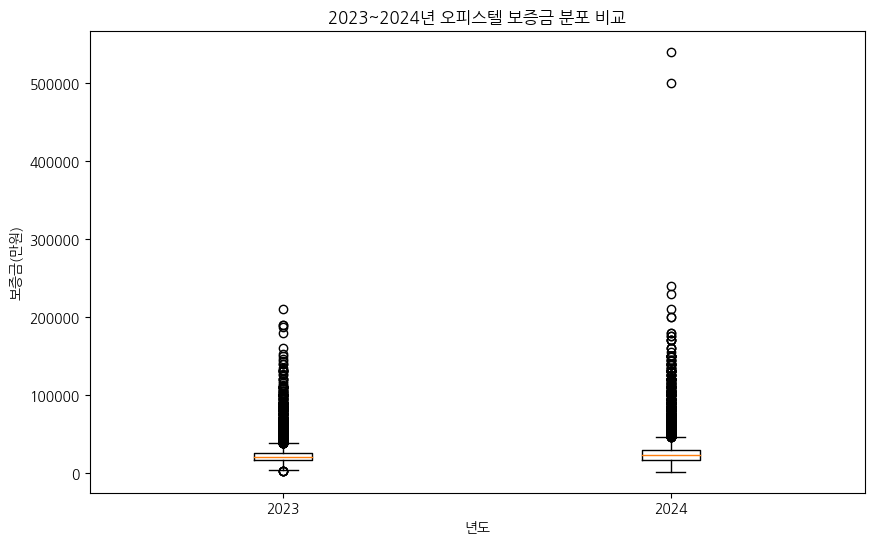

In [16]:
data = [
    officetel23_df['보증금(만원)'],
    officetel24_df['보증금(만원)']
]

plt.figure(figsize=(10,6))
plt.boxplot(data, labels=['2023', '2024']) 

plt.title('2023~2024년 오피스텔 보증금 분포 비교')
plt.ylabel('보증금(만원)')
plt.xlabel('년도')

plt.show()

### 거래 금액

In [17]:
officetel23_deal['거래금액(만원)'].describe()

count    8.982000e+03
mean     2.726468e+04
std      4.166513e+04
min      4.200000e+03
25%      1.530000e+04
50%      2.100000e+04
75%      3.080000e+04
max      2.400000e+06
Name: 거래금액(만원), dtype: float64

In [18]:
officetel24_deal['거래금액(만원)'].describe()

count     10942.000000
mean      29816.255895
std       32454.195517
min        3000.000000
25%       15500.000000
50%       22000.000000
75%       33000.000000
max      939500.000000
Name: 거래금액(만원), dtype: float64

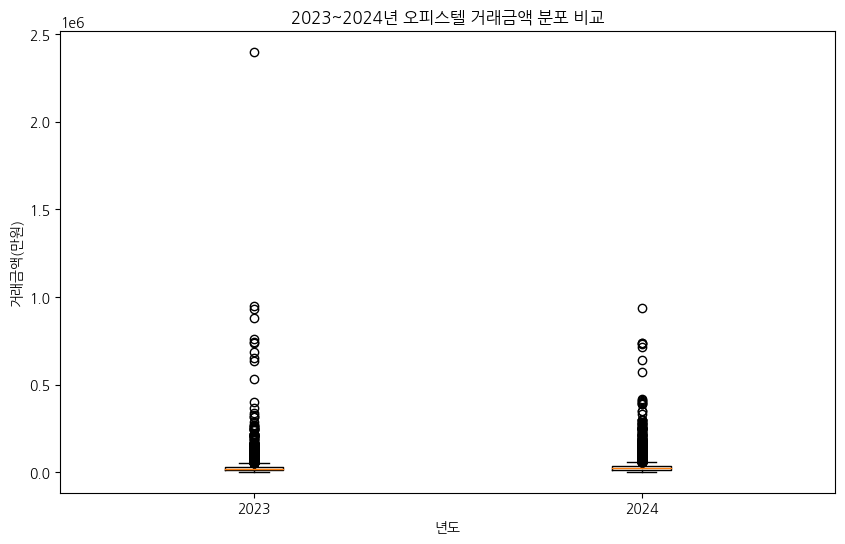

In [19]:
data = [
    officetel23_deal['거래금액(만원)'],
    officetel24_deal['거래금액(만원)']
]

plt.figure(figsize=(10,6))
plt.boxplot(data, labels=['2023', '2024']) 

plt.title('2023~2024년 오피스텔 거래금액 분포 비교')
plt.ylabel('거래금액(만원)')
plt.xlabel('년도')

plt.show()

### 23년, 24년 월별 전세 거래 건수

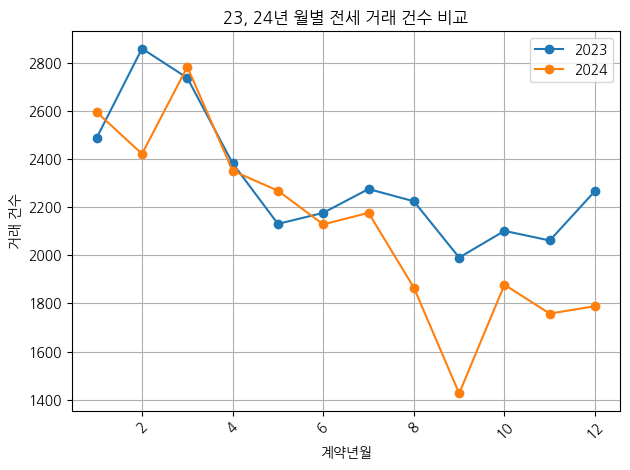

In [26]:
# 23, 24년 월별 거래 건수 계산
counts_23 = officetel23_df['계약년월'].dt.month.value_counts().sort_index()
counts_24 = officetel24_df['계약년월'].dt.month.value_counts().sort_index()

df_counts = pd.DataFrame({
    '2023': counts_23,
    '2024': counts_24
})

ax = df_counts.plot(marker='o')
ax.set_xlabel('계약년월')
ax.set_ylabel('거래 건수')
ax.set_title('23, 24년 월별 전세 거래 건수 비교')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid()
plt.show()

In [21]:
df_counts

,2023,2024
1,2489,2596
2,2860,2422
3,2738,2784
4,2383,2352
5,2131,2269
6,2177,2129
7,2276,2177
8,2225,1866
9,1991,1426
10,2102,1878


### 21, 22, 23년 월별 매매 거래 건수

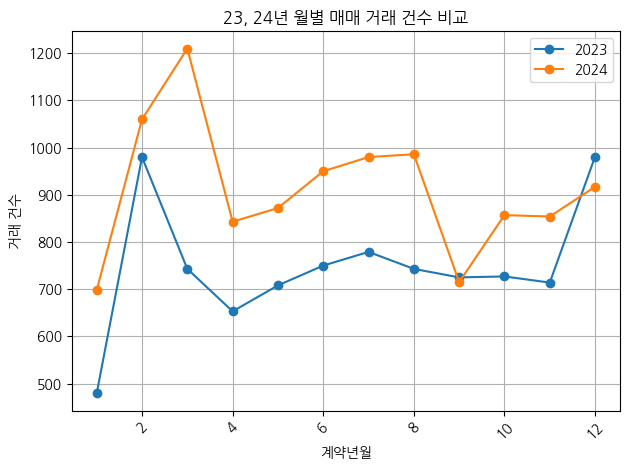

In [27]:
# 21, 22, 23년 월별 거래 건수 계산
counts_23 = officetel23_deal['계약년월'].dt.month.value_counts().sort_index()
counts_24 = officetel24_deal['계약년월'].dt.month.value_counts().sort_index()

df_counts = pd.DataFrame({
    '2023': counts_23,
    '2024': counts_24
})

ax = df_counts.plot(marker='o')
ax.set_xlabel('계약년월')
ax.set_ylabel('거래 건수')
ax.set_title('23, 24년 월별 매매 거래 건수 비교')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid()
plt.show()

In [23]:
df_counts

,2023,2024
1,479,698
2,980,1060
3,743,1210
4,653,843
5,708,872
6,750,950
7,779,980
8,743,986
9,725,715
10,727,857


### 거래 유형별 비율

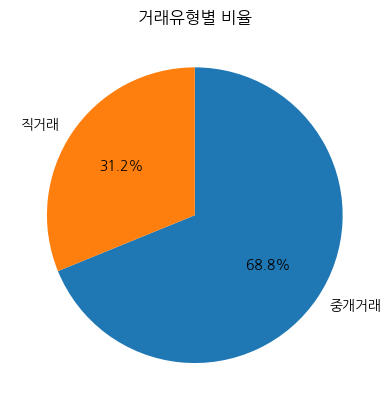

In [24]:
counts = officetel23_deal['거래유형'].value_counts()

# 파이 차트 그리기 (비율 표시 추가)
counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, counterclock=False)
plt.ylabel('')  # y축 라벨 제거
plt.title('거래유형별 비율')
plt.show()

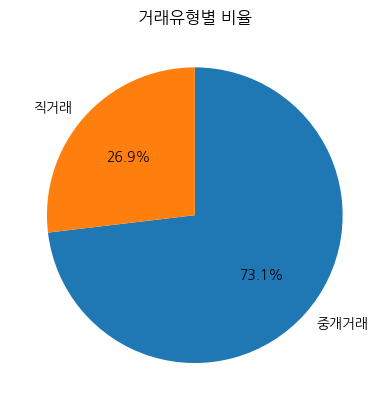

In [25]:
counts = officetel24_deal['거래유형'].value_counts()

# 파이 차트 그리기 (비율 표시 추가)
counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, counterclock=False)
plt.ylabel('')  # y축 라벨 제거
plt.title('거래유형별 비율')
plt.show()

### 전세 거래 상위 지역

Text(0.5, 1.0, '23년도 오피스텔 전세 거래 상위 지역')

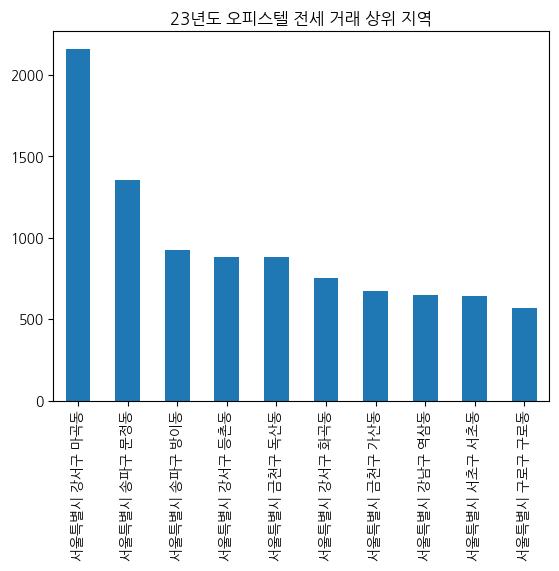

In [29]:
officetel23_df['시군구'].value_counts().head(10).plot(kind='bar')
plt.title('23년도 오피스텔 전세 거래 상위 지역')

Text(0.5, 1.0, '24년도 오피스텔 전세 거래 상위 지역')

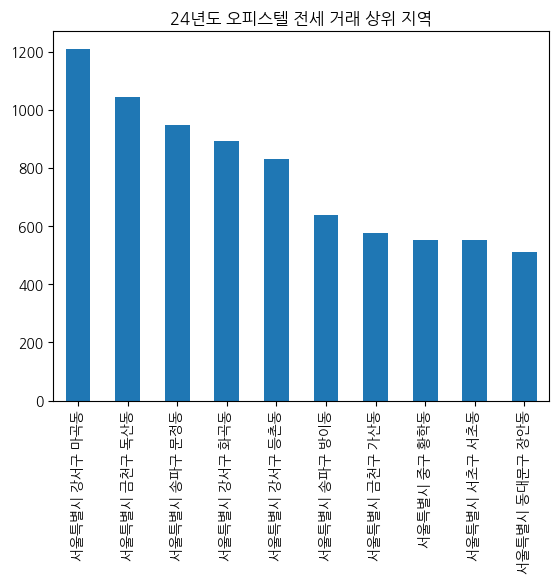

In [30]:
officetel24_df['시군구'].value_counts().head(10).plot(kind='bar')
plt.title('24년도 오피스텔 전세 거래 상위 지역')

### 매매 거래 상위 지역

Text(0.5, 1.0, '23년도 오피스텔 매매 거래 상위 지역')

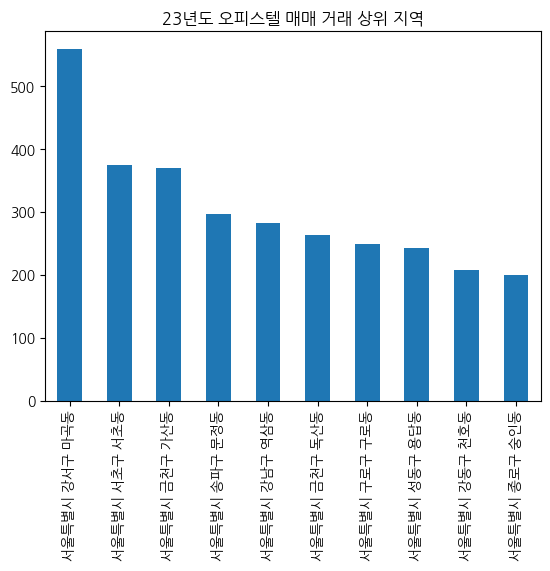

In [31]:
officetel23_deal['시군구'].value_counts().head(10).plot(kind='bar')
plt.title('23년도 오피스텔 매매 거래 상위 지역')

Text(0.5, 1.0, '24년도 오피스텔 매매 거래 상위 지역')

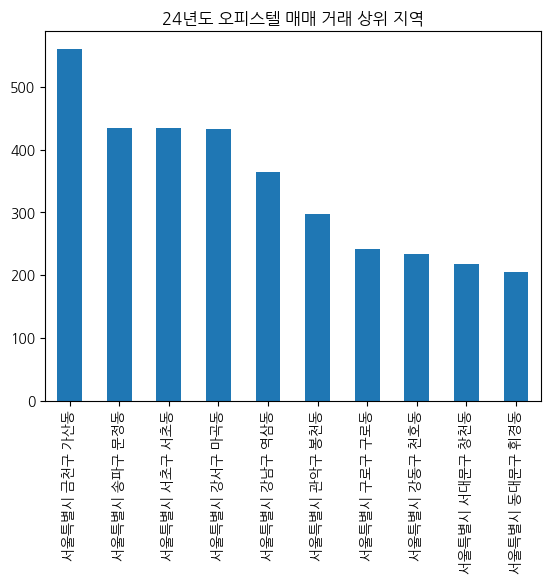

In [33]:
officetel24_deal['시군구'].value_counts().head(10).plot(kind='bar')
plt.title('24년도 오피스텔 매매 거래 상위 지역')